In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Telecom Customers Churn.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Replacing Blanks with 0 as tenure is 0 and no Total charges are recorded

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace( " ", "0" )
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df.duplicated().sum()

0

In [25]:
df['customerID'].duplicated().sum()

0

### Converted 0 & 1 Values of 'SeniorCitizen' Column into Yes & No to make it easier to understand 

In [28]:
def conv(Column_Value) :
    if Column_Value == 1:
        return "Yes"
    else:
        return "No"

In [30]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

### Count of Churn

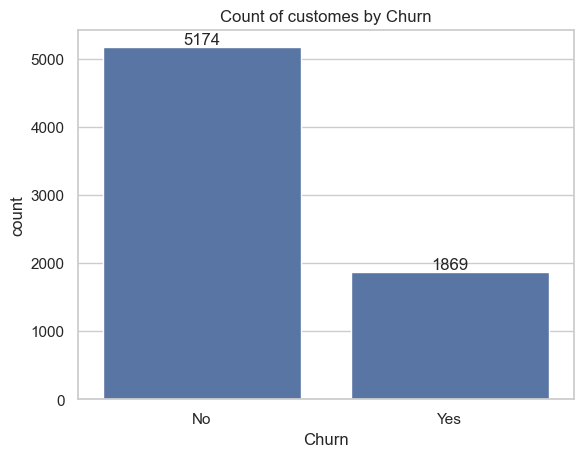

In [54]:
ax = sns.countplot( x = 'Churn', data = df )
ax.bar_label( ax.containers[0])
plt.title('Count of customes by Churn')
plt.show()

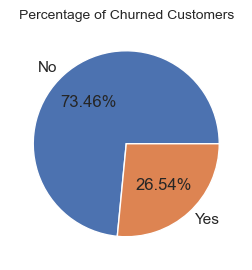

In [52]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title('Percentage of Churned Customers', fontsize = 10)
plt.show()

#### From the given Pie chart we can conclude that 26.54 % of our customers have churned out
#### Now let's Explore the reason behind it.

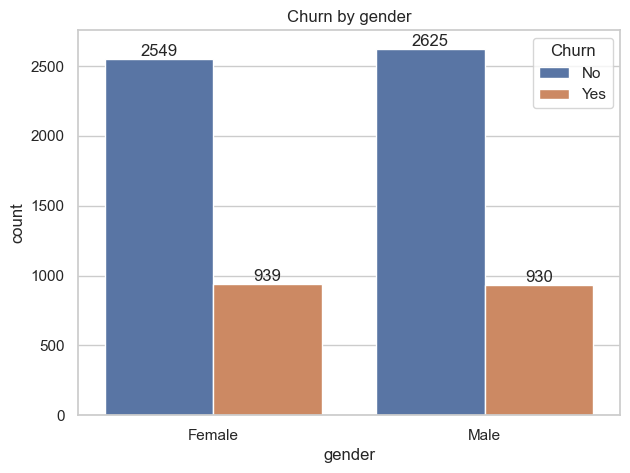

In [170]:
plt.figure(figsize = (7,5))
ax = sns.countplot( x = 'gender', data = df, hue = 'Churn' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by gender')
plt.show()

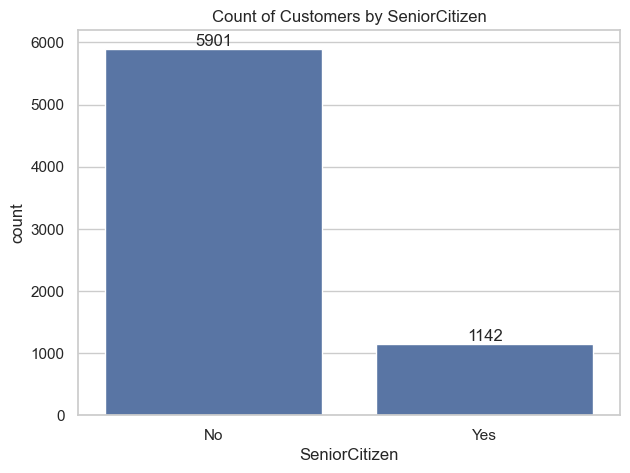

In [74]:
plt.figure(figsize = (7,5))
ax = sns.countplot( x = 'SeniorCitizen', data = df )
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by SeniorCitizen')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9484\1249195712.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, churn_perc.iloc[:index+1, :col_index+1].sum(axis=1)[index] - percent/2,
C:\Users\dell\AppData\Local\Temp\ipykernel_9484\1249195712.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, churn_perc.iloc[:index+1, :col_index+1].sum(axis=1)[index] - percent/2,
C:\Users\dell\AppData\Local\Temp\ipykernel_9484\1249195712.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

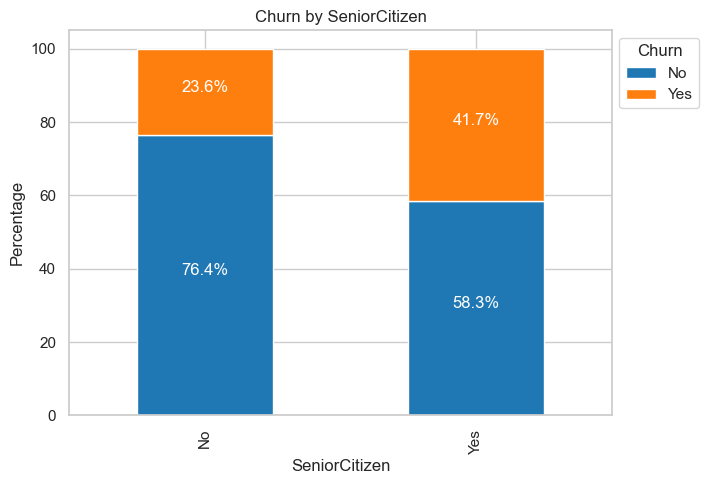

In [76]:
# Calculate the percentage of Churn by SeniorCitizen
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_perc = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
churn_perc.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')

# Add percentage labels
for index, total in enumerate(churn_counts.sum(axis=1)):
    for col_index, (percent, col_name) in enumerate(zip(churn_perc.iloc[index], churn_perc.columns)):
        plt.text(index, churn_perc.iloc[:index+1, :col_index+1].sum(axis=1)[index] - percent/2, 
                 f'{percent:.1f}%', ha='center', color='white')

plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Compartively a greater percentage of peopel in Senior Citizen Category have Churned.

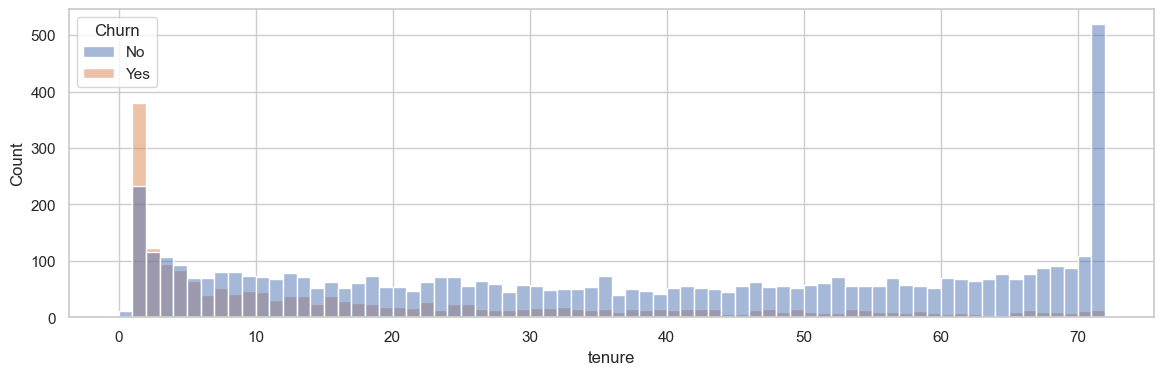

In [117]:
plt.figure(figsize=(14,4))
sns.histplot(x ='tenure', data = df , bins = 72, hue = 'Churn')
plt.show()

### People who have use our services for a long time have stayed and People who have use our services for 
### 1 or 2 months have "Churned"

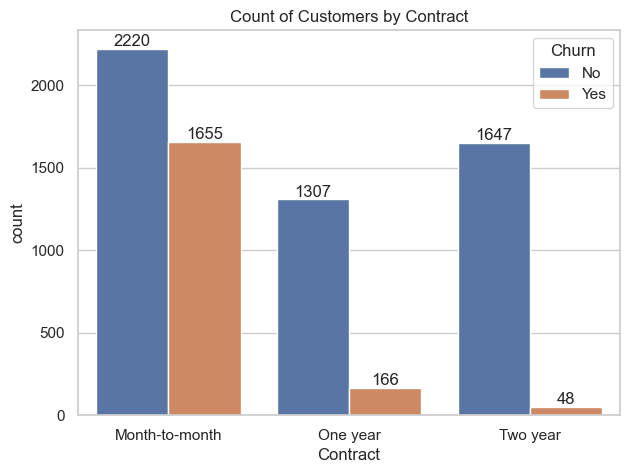

In [168]:
plt.figure(figsize = (7,5))
ax = sns.countplot( x = 'Contract', data = df, hue = 'Churn' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Contract')
plt.show()

### People who have Month to Month Contracts are likly to churn then from those who have 1 or 2 year of contract

In [131]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [137]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

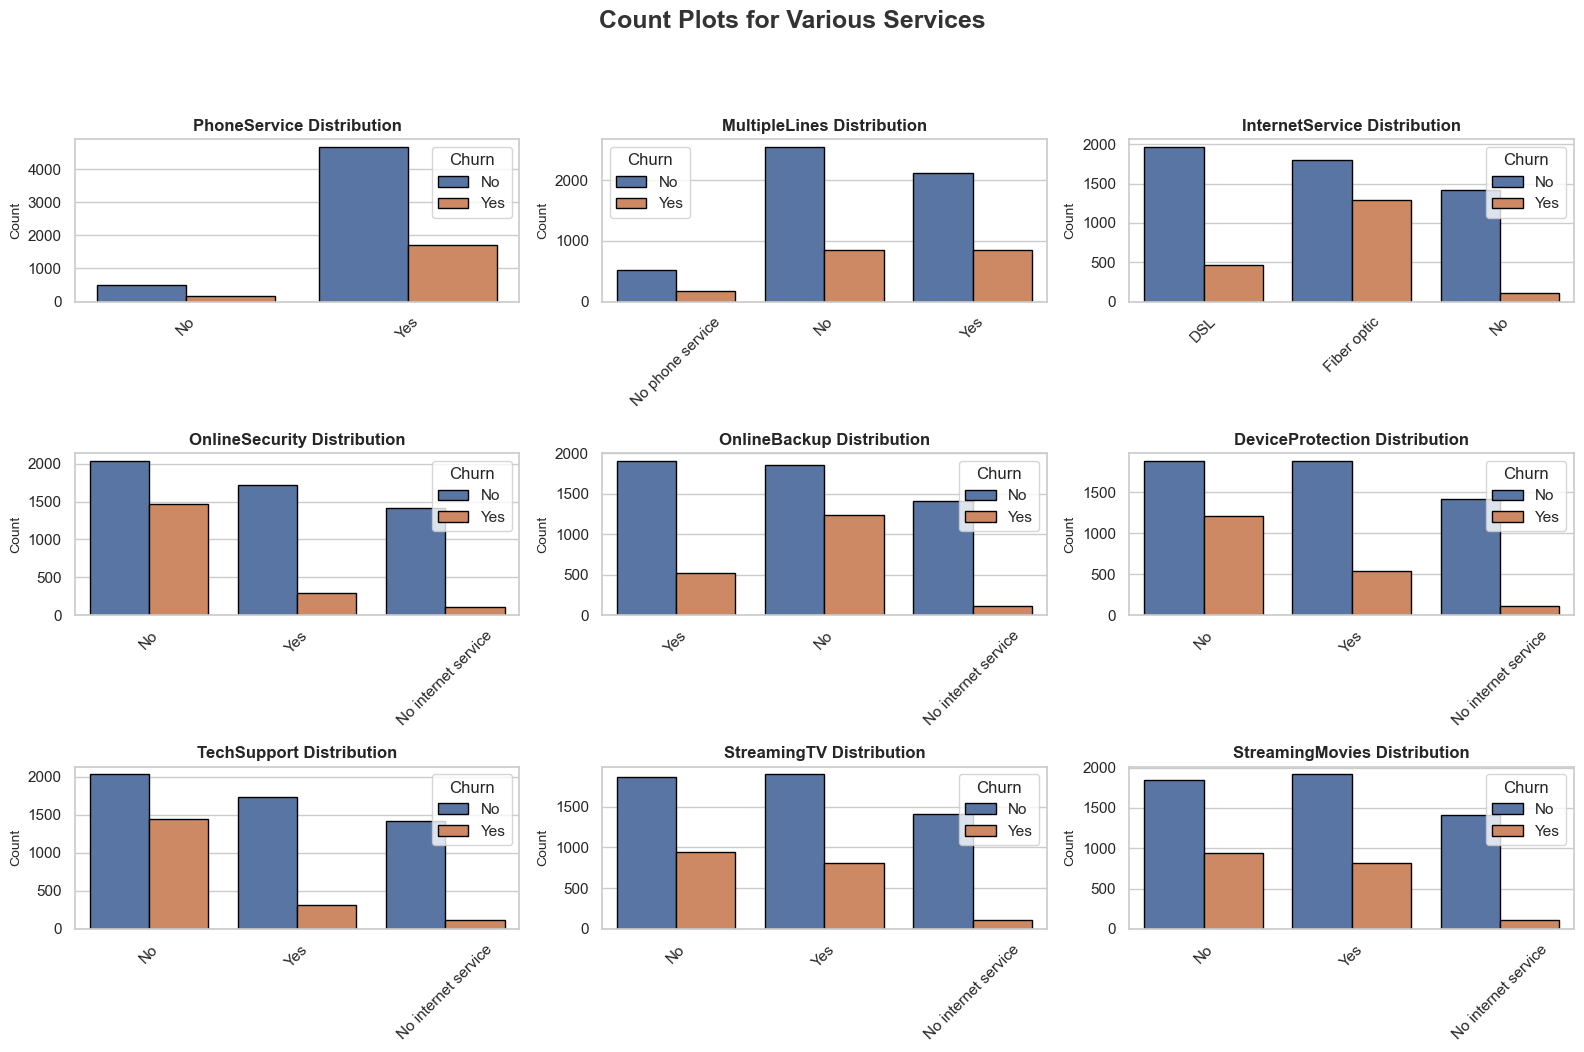

In [151]:
# Define the color theme globally
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Determine grid size for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Set up the figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
fig.suptitle('Count Plots for Various Services', fontsize=18, fontweight='bold', color='#333333', y=1.05)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a count plot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], edgecolor="black", hue = df['Churn'])  # Removed palette
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')  # Hide x-axis label to reduce clutter
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Summary insights from the data:

#### 1. Higher retention is seen among customers with PhoneService and MultipleLines.

#### 2. Fiber optic internet users show higher churn rates compared to other types.

#### 3. Absence of services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport correlates with higher churn rates.

#### 4. Similarly, not having StreamingTV and StreamingMovies increases churn, indicating additional services might help in customer retention.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


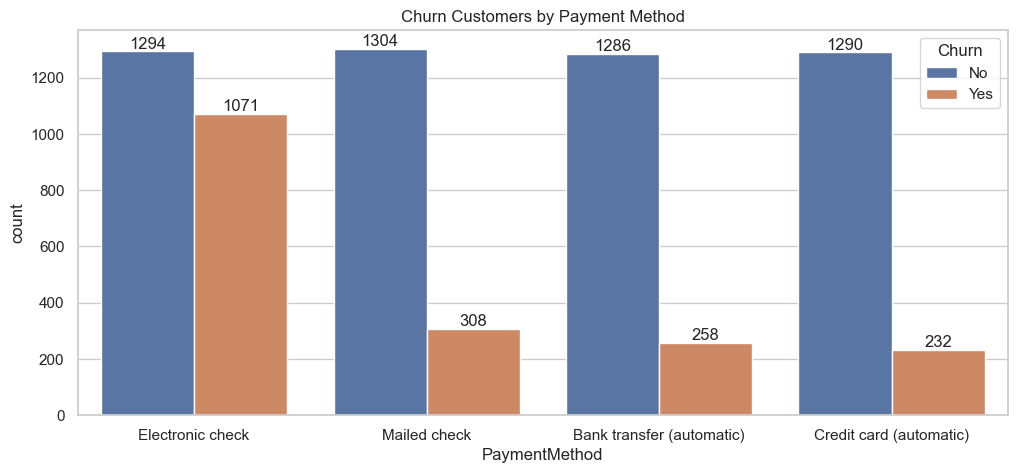

In [176]:
plt.figure(figsize = (12,5))
ax = sns.countplot( x = 'PaymentMethod', data = df, hue = 'Churn' )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn Customers by Payment Method')
plt.show()

#### Customer is likly to churn when he is using "Electronic Check" as a Payment method